In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
import seaborn as sns


# Read dataset

In [27]:
df1=pd.read_csv(r'tmdb_5000/tmdb_5000_credits.csv')

df1.columns = ['id','title','cast','crew']

df2=pd.read_csv(r'tmdb_5000/tmdb_5000_movies.csv')

df= df1.merge(df2,on=['id','title'])

df.drop(['homepage'],axis=1,inplace=True)

df['tagline'] = df['tagline'].fillna('')
df['overview'] = df['overview'].fillna('')

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.drop_duplicates(subset=['id', 'title'], inplace=True)

df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
df['year'] = df['year'].astype(int)

## dataframe information

In [28]:
print(f'Shape of the dataframe: {df.shape}')

print('\n')

print(f'columns: {df.columns}')

Shape of the dataframe: (4800, 22)


columns: Index(['id', 'title', 'cast', 'crew', 'budget', 'genres', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline',
       'vote_average', 'vote_count', 'year'],
      dtype='object')


In [29]:
print(f'Information about the dataframe: \n{df.info()}')

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4800 non-null   int64  
 1   title                 4800 non-null   object 
 2   cast                  4800 non-null   object 
 3   crew                  4800 non-null   object 
 4   budget                4800 non-null   int64  
 5   genres                4800 non-null   object 
 6   keywords              4800 non-null   object 
 7   original_language     4800 non-null   object 
 8   original_title        4800 non-null   object 
 9   overview              4800 non-null   object 
 10  popularity            4800 non-null   float64
 11  production_companies  4800 non-null   object 
 12  production_countries  4800 non-null   object 
 13  release_date          4800 non-null   object 
 14  revenue               4800 non-null   int64  
 15  runtime               4800

In [30]:
df.head(2)

,id,title,cast,crew,budget,genres,keywords,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,year
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,2009
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,2007


# **Knowledge based Recommender**

In [31]:
import pandas as pd 
import numpy as np 
from ast import literal_eval

df1=pd.read_csv(r'tmdb_5000/tmdb_5000_credits.csv')

df1.columns = ['id','title','cast','crew']

df2=pd.read_csv(r'tmdb_5000/tmdb_5000_movies.csv')

df= df1.merge(df2,on=['id','title'])

df['tagline'] = df['tagline'].fillna('')
df['overview'] = df['overview'].fillna('')

df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

df.drop(['homepage', 'original_title', 'release_date', 'spoken_languages', 'status'],axis=1,inplace=True)

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.drop_duplicates(subset=['id', 'title'], inplace=True)


In [32]:
df['genres'] = df['genres'].apply(literal_eval)
df['genres'] = df['genres'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

df['production_countries'] = df['production_countries'].apply(literal_eval)
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

df['production_companies'] = df['production_companies'].apply(literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

df['cast'] = df['cast'].apply(literal_eval)
df['crew'] = df['crew'].apply(literal_eval)
df['keywords'] = df['keywords'].apply(literal_eval)
df['cast_size'] = df['cast'].apply(lambda x: len(x))
df['crew_size'] = df['crew'].apply(lambda x: len(x))

In [33]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

df['director'] = df['crew'].apply(get_director)

In [34]:
df['actor'] = df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
df['actor'] = df['actor'].apply(lambda x: x[:3] if len(x) >=3 else x)

df['character'] = df['cast'].apply(lambda x: [i['character'] for i in x] if isinstance(x, list) else [])
df['character'] = df['character'].apply(lambda x: x[:3] if len(x) >=3 else x)

df['keywords'] = df['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [35]:
movies_df = df[['id', 'title', 'year', 'genres', 'vote_average', 'vote_count', 'popularity', 'budget', 'revenue', 'original_language', 'production_countries', 'runtime',
        'production_companies', 'director', 'actor', 'character', 'cast_size', 'crew_size', 'overview', 'tagline', 'keywords']]

In [36]:
print(f'Shape of the movies dataframe: {movies_df.shape}')

movies_df.head(2)

Shape of the movies dataframe: (4801, 21)


,id,title,year,genres,vote_average,vote_count,popularity,budget,revenue,original_language,...,runtime,production_companies,director,actor,character,cast_size,crew_size,overview,tagline,keywords
0,19995,Avatar,2009,"[Action, Adventure, Fantasy, Science Fiction]",7.2,11800,150.437577,237000000,2787965087,en,...,162.0,"[Ingenious Film Partners, Twentieth Century Fo...",James Cameron,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Jake Sully, Neytiri, Dr. Grace Augustine]",83,153,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,"[culture clash, future, space war, space colon..."
1,285,Pirates of the Caribbean: At World's End,2007,"[Adventure, Fantasy, Action]",6.9,4500,139.082615,300000000,961000000,en,...,169.0,"[Walt Disney Pictures, Jerry Bruckheimer Films...",Gore Verbinski,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[Captain Jack Sparrow, Will Turner, Elizabeth ...",34,32,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.","[ocean, drug abuse, exotic island, east india ..."


# **Demographic Filtering**

![](https://image.ibb.co/jYWZp9/wr.png)

### where

* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

In [37]:
C= df['vote_average'].mean()
print(f'Mean vote across the whole report: {C}')

m= df['vote_count'].quantile(0.85)
print(f'Minimum votes required to be listed in the chart: {m}')

Mean vote across the whole report: 6.093188918975214
Minimum votes required to be listed in the chart: 1301.0


In [38]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [39]:
q_movies = df.copy().loc[df['vote_count'] >= m]
print(f'shape of the filtered dataframe: {q_movies.shape}')

shape of the filtered dataframe: (721, 23)


In [40]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [41]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.170602
662,Fight Club,9413,8.3,8.032027
3232,Pulp Fiction,8428,8.3,8.004897
65,The Dark Knight,12002,8.2,7.993959
3337,The Godfather,5893,8.4,7.982824
96,Inception,13752,8.1,7.926555
809,Forrest Gump,7927,8.2,7.902973
95,Interstellar,10867,8.1,7.885432
329,The Lord of the Rings: The Return of the King,8064,8.1,7.821211
1990,The Empire Strikes Back,5879,8.2,7.818251


Text(0.5, 1.0, 'Popular Movies')

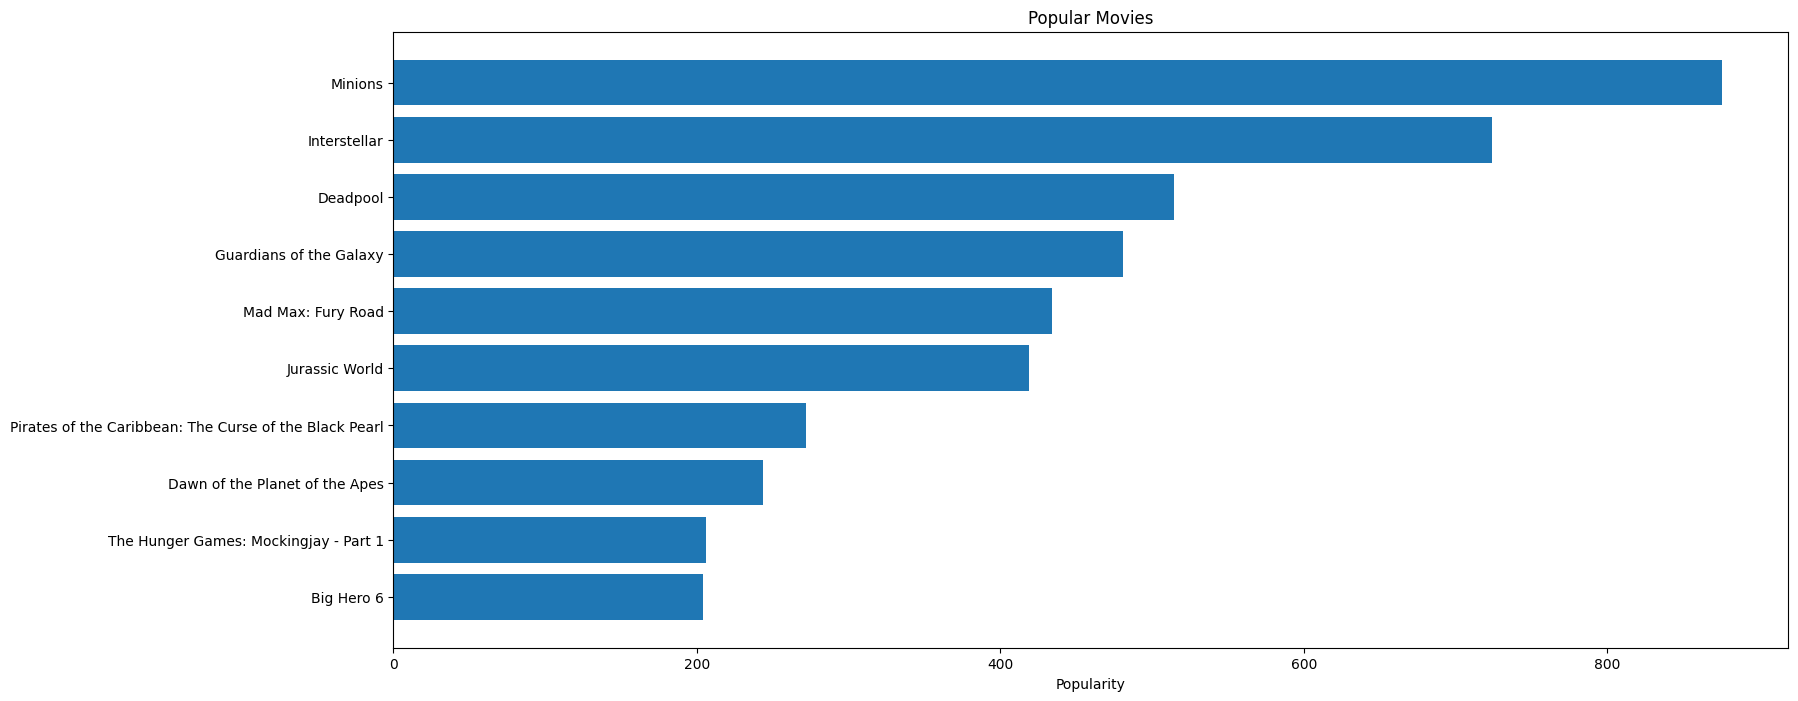

In [42]:
import matplotlib.pyplot as plt

pop= q_movies.sort_values('popularity', ascending=False)

plt.figure(figsize=(18,8))
plt.barh(pop['title'].head(10),pop['popularity'].head(10), align='center')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")


# **Content Based Filtering**

In [43]:
df['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [44]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4801, 20978)

## **Cosine similarity**

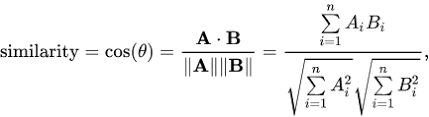

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's **linear_kernel()** instead of cosine_similarities() since it is faster.

In [45]:
# Import linear_kernel
# from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
# cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim_1 = cosine_similarity(tfidf_matrix, tfidf_matrix)

cosine_sim_1.shape

(4801, 4801)

In [46]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

indices.head()

title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64

In [47]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim, recommendations_num=10):
    
    recommendations_num = recommendations_num + 1
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:recommendations_num]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [48]:
get_recommendations('The Dark Knight Rises', cosine_sim_1)

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [49]:
get_recommendations('The Avengers', cosine_sim_1)

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

# Credits, Genres and Keywords Based Recommender

In [51]:
df1=pd.read_csv(r'tmdb_5000/tmdb_5000_credits.csv')

df1.columns = ['id','title','cast','crew']

df2=pd.read_csv(r'tmdb_5000/tmdb_5000_movies.csv')

df= df1.merge(df2,on=['id','title'])

df.drop(['homepage'],axis=1,inplace=True)

df['tagline'] = df['tagline'].fillna('')
df['overview'] = df['overview'].fillna('')

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.drop_duplicates(subset=['id', 'title'], inplace=True)

df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
df['year'] = df['year'].astype(int)

In [52]:
# convert the column into a safe and usable structure form of "stringified"
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(literal_eval)

In [53]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [54]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [55]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df['director'] = df['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(get_list)

In [56]:
# Print the new features of the first 3 films
df[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [57]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [58]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df[feature] = df[feature].apply(clean_data)

df['clean_title'] = df['title'].apply(lambda x: x.lower().split())

In [59]:
# Print the new features of the first 3 films
df[['title', 'clean_title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,clean_title,cast,director,keywords,genres
0,Avatar,[avatar],"[samworthington, zoesaldana, sigourneyweaver]",jamescameron,"[cultureclash, future, spacewar]","[action, adventure, fantasy]"
1,Pirates of the Caribbean: At World's End,"[pirates, of, the, caribbean:, at, world's, end]","[johnnydepp, orlandobloom, keiraknightley]",goreverbinski,"[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]"
2,Spectre,[spectre],"[danielcraig, christophwaltz, léaseydoux]",sammendes,"[spy, basedonnovel, secretagent]","[action, adventure, crime]"


In [60]:
def create_soup(x):
    return ' '.join(x['clean_title']) + ' ' + ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df['soup'] = df.apply(create_soup, axis=1)

In [61]:
print(df['soup'].loc[0])

df['soup'].head(3)

avatar cultureclash future spacewar samworthington zoesaldana sigourneyweaver jamescameron action adventure fantasy


0    avatar cultureclash future spacewar samworthin...
1    pirates of the caribbean: at world's end ocean...
2    spectre spy basedonnovel secretagent danielcra...
Name: soup, dtype: object

## **CountVectorizer()**

In [62]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['soup'])

count_matrix.shape

(4800, 15189)

In [63]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.metrics.pairwise import linear_kernel

cosine_sim_2 = cosine_similarity(count_matrix, count_matrix)
# cosine_sim_2 = linear_kernel(count_matrix, count_matrix)


cosine_sim_2.shape

(4800, 4800)

In [64]:
get_recommendations('The Dark Knight Rises', cosine_sim_2)

65                              The Dark Knight
119                               Batman Begins
4638                   Amidst the Devil's Wings
1196                               The Prestige
2609                                  Dark Blue
3073                          Romeo Is Bleeding
535                                First Knight
3854    Batman: The Dark Knight Returns, Part 2
1503                                     Takers
1986                                     Faster
Name: title, dtype: object

In [65]:
get_recommendations('The Avengers', cosine_sim_2)

7                   Avengers: Age of Ultron
26               Captain America: Civil War
79                               Iron Man 2
174                     The Incredible Hulk
169      Captain America: The First Avenger
85      Captain America: The Winter Soldier
203                                      X2
511                                   X-Men
1294                               Serenity
31                               Iron Man 3
Name: title, dtype: object

## Using only Numerical column for **Content Based Filtering**

In [67]:
df.head(3)

,id,title,cast,crew,budget,genres,keywords,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,vote_average,vote_count,year,director,clean_title,soup
0,19995,Avatar,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",237000000,"[action, adventure, fantasy]","[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,2009,jamescameron,[avatar],avatar cultureclash future spacewar samworthin...
1,285,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",300000000,"[adventure, fantasy, action]","[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,2007,goreverbinski,"[pirates, of, the, caribbean:, at, world's, end]",pirates of the caribbean: at world's end ocean...
2,206647,Spectre,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",245000000,"[action, adventure, crime]","[spy, basedonnovel, secretagent]",en,Spectre,A cryptic message from Bond’s past sends him o...,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,2015,sammendes,[spectre],spectre spy basedonnovel secretagent danielcra...


In [71]:
ndf = df.select_dtypes(include=["float64","int64","float32","int32"])

ndf.drop(columns=['id'], inplace=True)

print(f'ndf shape is: {ndf.shape}')

ndf.head()

ndf shape is: (4800, 7)


,budget,popularity,revenue,runtime,vote_average,vote_count,year
0,237000000,150.437577,2787965087,162.0,7.2,11800,2009
1,300000000,139.082615,961000000,169.0,6.9,4500,2007
2,245000000,107.376788,880674609,148.0,6.3,4466,2015
3,250000000,112.312950,1084939099,165.0,7.6,9106,2012
4,260000000,43.926995,284139100,132.0,6.1,2124,2012


In [72]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler

# Create MinMaxScaler Object
scaler = MinMaxScaler(feature_range=(0, 1))

# Create dataframe after transformation
ndfmx = pd.DataFrame((scaler.fit_transform(ndf)))

# assign column names
ndfmx.columns=ndf.columns

# Show initial 5 records
ndfmx.head()


,budget,popularity,revenue,runtime,vote_average,vote_count,year
0,0.623684,0.171814,1.000000,0.479290,0.72,0.858057,0.920792
1,0.789474,0.158846,0.344696,0.500000,0.69,0.327225,0.900990
2,0.644737,0.122634,0.315884,0.437870,0.63,0.324753,0.980198
3,0.657895,0.128272,0.389151,0.488166,0.76,0.662158,0.950495
4,0.684211,0.050169,0.101916,0.390533,0.61,0.154450,0.950495


In [73]:
# Import cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity
cosine_sim_3 = cosine_similarity(ndfmx, ndfmx)

cosine_sim_3.shape

(4800, 4800)

In [74]:
# Reverse mapping of indices and movie titles
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

print(f'Indices shape is: {indices.shape}')
indices.head()

Indices shape is: (4800,)


title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64

In [75]:
get_recommendations('The Dark Knight', cosine_sim_3)

96                                             Inception
16                                          The Avengers
68                                              Iron Man
3                                  The Dark Knight Rises
31                                            Iron Man 3
262    The Lord of the Rings: The Fellowship of the Ring
197             Harry Potter and the Philosopher's Stone
29                                               Skyfall
287                                     Django Unchained
199    Pirates of the Caribbean: The Curse of the Bla...
Name: title, dtype: object

# Marge the two cosine similarity matrices

In [ ]:
alpha = 0.3  # Hyperparameter to balance the two matrices

combined_sim = alpha * cosine_sim_1 + (1 - alpha) * cosine_sim_2

combined_sim.shape

(4800, 4800)

In [ ]:
get_recommendations('The Dark Knight Rises', combined_sim)

65                              The Dark Knight
119                               Batman Begins
3854    Batman: The Dark Knight Returns, Part 2
299                              Batman Forever
1196                               The Prestige
4638                   Amidst the Devil's Wings
2609                                  Dark Blue
3073                          Romeo Is Bleeding
535                                First Knight
1359                                     Batman
Name: title, dtype: object

In [ ]:
get_recommendations('The Avengers', combined_sim)

7                   Avengers: Age of Ultron
26               Captain America: Civil War
174                     The Incredible Hulk
79                               Iron Man 2
169      Captain America: The First Avenger
85      Captain America: The Winter Soldier
511                                   X-Men
203                                      X2
1294                               Serenity
182                                 Ant-Man
Name: title, dtype: object